In [26]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [30]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Questions:
1. What is the most frequent genre of movies released on Netflix?
2. Which has highest votes in vote avg column?
3. What movie got the highest popularity? what's its genre?
4. What movie got the lowest popularity? what's its genre?
5. Which year has the most filmmed movies?

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


# exploration summary:
1. Release_Date- object to datetime dtype.
2. split genre
3. Drop Overview, Original_Language, Poster_Url columns , since not required.
4. Release_Date- only year required.

In [36]:
df.duplicated().sum()

0

In [38]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [40]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [42]:
df['Release_Date'].info

<bound method Series.info of 0      2021-12-15
1      2022-03-01
2      2022-02-25
3      2021-11-24
4      2021-12-22
          ...    
9822   1973-10-15
9823   2020-10-01
9824   2016-05-06
9825   2021-03-31
9826   1984-09-23
Name: Release_Date, Length: 9827, dtype: datetime64[ns]>

In [44]:
df['Release_Date']= df['Release_Date'].dt.year

In [46]:
print(df['Release_Date'].dtypes)

int32


In [48]:
cols=['Overview','Original_Language','Poster_Url']

In [50]:
df.drop(cols, axis=1, inplace=True)

In [52]:
df.head()                      

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [54]:
df['Genre']=df['Genre'].str.split(', ')

In [56]:
df=df.explode('Genre')

In [58]:
df=df.reset_index(drop=True)

In [60]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [62]:
df['Genre']=df['Genre'].astype('category')

In [64]:
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [66]:
df['Genre'].nunique()

19

In [68]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

# Categorizing Vote_Average columns into 4 different categories:
# 1.popular, 2.average, 3.below_average, 4.not_popular

In [71]:
def categorize_col(df, col, labels):

    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]

    df[col]=pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df
           

In [73]:
labels=['not_popular', 'below_average', 'average', 'popular']

categorize_col(df, 'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


In [116]:
df.dropna(inplace=True)

In [117]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [120]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular      6999
below_average    6581
average          6432
popular          5540
Name: count, dtype: int64

In [122]:
df['Vote_Average'].describe()

count           25552
unique              4
top       not_popular
freq             6999
Name: Vote_Average, dtype: object

In [99]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Genre distribution')

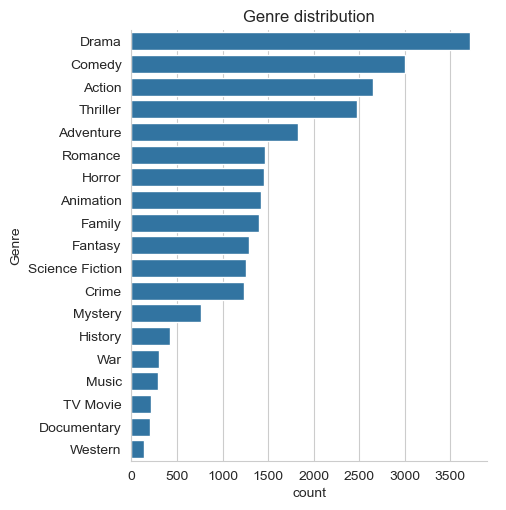

In [101]:
sns.catplot(y='Genre', data=df, kind='count', order=df['Genre'].value_counts().index)
plt.title('Genre distribution')

Text(0.5, 1.0, 'Vote_avg Distribution')

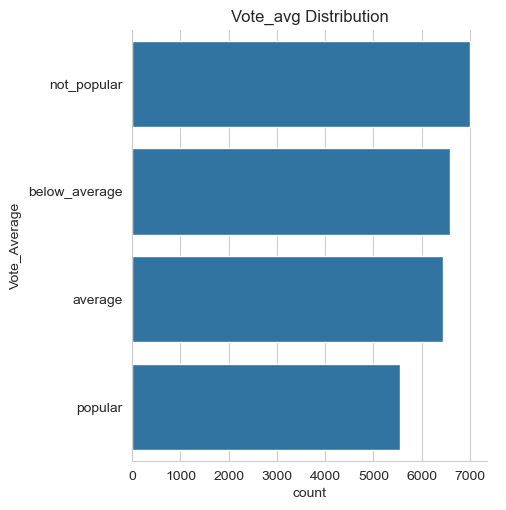

In [104]:
sns.catplot(y='Vote_Average', data=df, kind='count', order=df['Vote_Average'].value_counts().index)
plt.title('Vote_avg Distribution')

In [106]:
df['Popularity'].info

<bound method Series.info of 0        5083.954
1        5083.954
2        5083.954
3        3827.658
4        3827.658
           ...   
25788      13.354
25789      13.354
25790      13.354
25791      13.354
25792      13.354
Name: Popularity, Length: 25552, dtype: float64>

In [108]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [110]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


Text(0.5, 1.0, 'Release_Date Distribution')

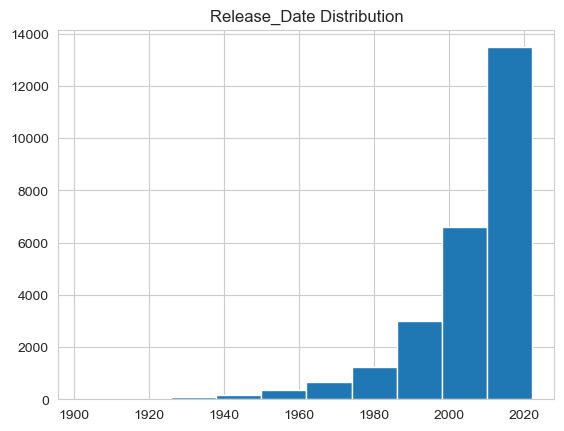

In [112]:
df['Release_Date'].hist()
plt.title('Release_Date Distribution')

# Conclusion Summary:
# 1. What is the most frequent genre of movies released on Netflix?
    'Drama' is the most frequent genre in the dataset, 14.5% of all 19 genres. 
# 2. Which has highest votes in vote avg column?
    27.39% of vote_avg are for non_popular movies, popular movies covers 21.6%.
# 3. What movie got the highest popularity? what's its genre?
    'Spider-Man: No Way Home' has highest popularity and its genres are Action, Adventure and Science Fiction.
# 4. What movie got the lowest popularity? what's its genre?
    'The United States vs. Billie Holiday' and 'Threads' have lowest popularity, genres are Music, Drama, History, War, Drama, Science Fiction
# 5. Which year has the most filmmed movies?
    Most of the movies in dataset are filmmed in year '2020'.